#  Machine learning project notebook

### Student: G00219132 Susan Hudson - Module: Machine Learning & Statistics, GMIT

In [1]:
import datetime
print('\n'*2)
print ('**************************************************')
print ("Run date and time: " ,datetime.datetime.now().strftime("Date: %d-%m-%y    Time: %H-%M"))
print ('**************************************************')
print()
print()




**************************************************
Run date and time:  Date: 26-11-19    Time: 18-41
**************************************************




In [2]:
#command below ensures plots display correctly in the notebook

#below imports all necessary python packages for this notebook
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import numpy as np
import sklearn.datasets
import seaborn as sns
import keras as kr

Using TensorFlow backend.


## Import dataset and Descriptive Statistics

In [3]:
# dataset is imported and converted to a pandas dataframe
sklearn.datasets.load_boston
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

In [4]:
# check data set shape and print first five rows
print(boston.data.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

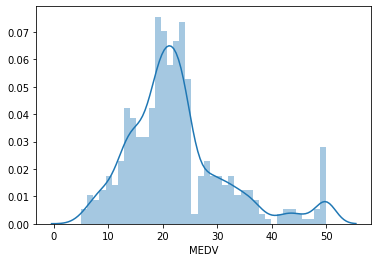

In [7]:
sns.distplot(df["MEDV"], bins=40)
plt.show()


Plot of Median Value shows a mainly mormal distribution.

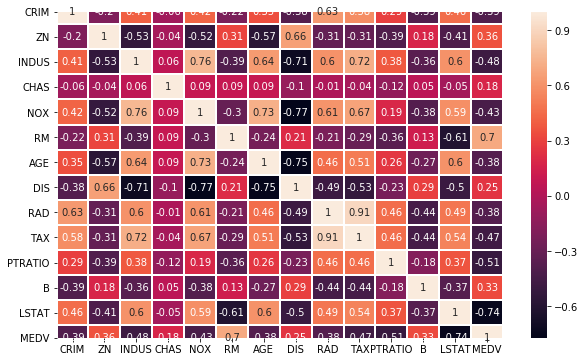

In [8]:
# correlation heatmap
correlation_heatmap = df.corr().round(2)

#ax.set_ylim(len(df)-.5 ,-.5)
fig, ax = plt.subplots(figsize=(10,6))   
#ax.set_ylim(len(df)-.5 ,-.5)
sns.heatmap(correlation_heatmap, annot=True,linewidths= 1, ax=ax)

plt.show()

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


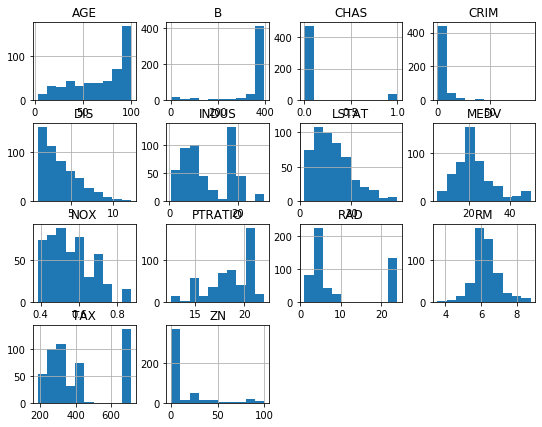

In [10]:
df.hist(bins=10, figsize=(9,7), grid=True)
plt.show()

//sns.set(style="ticks", color_codes=True)
//sns.pairplot(df)

In [11]:
# create two subsets to do a t test to see whether the mean of median values is the same for houses bordering the river 
# and houses not near the river. the hypothesis I am testing being that there is no difference in the average median value
# of properties based on riverside location.
# note: not really sure this is of any value as within each subset will be other variables that have a greater impact on price
# for example - number of rooms may be influencing price

dfnear =  df[(df['CHAS'] == 1.0)]
dfnear.reset_index(inplace= True)
#print(dfnear)


dffar =  df[(df['CHAS'] == 0.0)]
dffar.reset_index(inplace= True)
#print(dffar)

from scipy.stats import ttest_ind
n =dfnear['MEDV']
f =dffar['MEDV']
ss.ttest_ind(n,f)

# result obtained causes me to reject the hypothesis

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

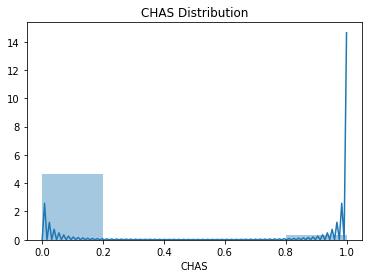

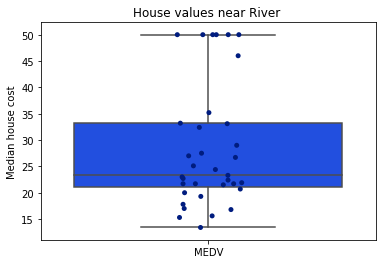

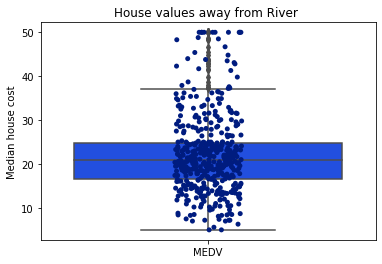

In [12]:
sns.distplot(df["CHAS"], bins=5).set_title ("CHAS Distribution")
plt.show()


df4 = pd.DataFrame(data = dfnear, columns = [ 'MEDV'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df4), palette="bright").set_title("House values near River ")
sns.stripplot(x="variable", y="value", data= pd.melt(df4), palette="dark").set_title("House values near River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()


df5 = pd.DataFrame(data = dffar, columns = [ 'MEDV'] )
sns.stripplot (x="variable", y="value", data= pd.melt(df5), palette="dark").set_title("House values away from River ")

sns.boxplot(x="variable", y="value", data= pd.melt(df5), palette="bright").set_title("House values away from River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

## predictive

Build a neural network using keras and splitting the data into train (80%) and test (20%)


In [13]:
# check data types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [14]:
from sklearn.model_selection import train_test_split 
#dataset = df.values
#dataset =   df[(df['RM', 'ZN', 'PTRATIO', 'LSTAT','MEDV'])]
#print(dataset)
Y=df['MEDV']
print(Y)
X =df[['ZN','RM', 'LSTAT','PTRATIO' ]]

print(X)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
       ZN     RM  LSTAT  PTRATIO
0    18.0  6.575   4.98     15.3
1     0.0  6.421   9.14     17.8
2     0.0  7.185   4.03     17.8
3     0.0  6.998   2.94     18.7
4     0.0  7.147   5.33     18.7
..    ...    ...    ...      ...
501   0.0  6.593   9.67     21.0
502   0.0  6.120   9.08     21.0
503   0.0  6.976   5.64     21.0
504   0.0  6.794   6.48     21.0
505   0.0  6.030   7.88     21.0

[506 rows x 4 columns]


In [15]:
#X = dataset[:,0:13]
#Y = dataset[:,13]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test)
print(X_test)

(404, 4)
(102, 4)
(404,)
(102,)
66     19.4
86     22.5
90     22.6
0      24.0
301    22.0
       ... 
450    13.4
426    10.2
38     24.7
413    16.3
73     23.4
Name: MEDV, Length: 102, dtype: float64
       ZN     RM  LSTAT  PTRATIO
66   80.0  5.787  10.24     16.1
86    0.0  6.015  12.86     18.5
90    0.0  6.417   8.81     17.8
0    18.0  6.575   4.98     15.3
301  34.0  6.590   9.50     16.1
..    ...    ...    ...      ...
450   0.0  6.749  17.44     20.2
426   0.0  5.837  15.69     20.2
38    0.0  5.966  10.13     19.2
413   0.0  5.155  20.08     20.2
73    0.0  6.245   7.54     19.2

[102 rows x 4 columns]


In [17]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
m.add(layers.Dense(64, activation='relu', input_dim =4))
m.add(layers.Dense(64, activation='relu'))
m.add(layers.Dense(1))
m.compile(loss='mse', optimizer='adam',metrics=['mae'])
    


In [18]:
x = X_train
y = m.predict(x)
m.fit(X_train,Y_train, epochs =250, batch_size =25)

Epoch 1/250
404/404 [==============================] - 2s 4ms/step - loss: 381.9811 - mae: 16.4116
Epoch 2/250
404/404 [==============================] - 0s 309us/step - loss: 163.4520 - mae: 9.5326
Epoch 3/250
404/404 [==============================] - 0s 277us/step - loss: 129.7368 - mae: 8.3259
Epoch 4/250
404/404 [==============================] - 0s 329us/step - loss: 100.3485 - mae: 7.1736
Epoch 5/250
404/404 [==============================] - 0s 361us/step - loss: 81.0211 - mae: 6.4647
Epoch 6/250
404/404 [==============================] - 0s 324us/step - loss: 65.9352 - mae: 5.7789
Epoch 7/250
404/404 [==============================] - 0s 337us/step - loss: 57.8340 - mae: 5.5083
Epoch 8/250
404/404 [==============================] - 0s 337us/step - loss: 53.5655 - mae: 5.5044
Epoch 9/250
404/404 [==============================] - 0s 386us/step - loss: 50.8218 - mae: 5.2852
Epoch 10/250
404/404 [==============================] - 0s 423us/step - loss: 48.7658 - mae: 5.2105
Epoch 

404/404 [==============================] - 0s 327us/step - loss: 21.6954 - mae: 3.2141
Epoch 82/250
404/404 [==============================] - 0s 384us/step - loss: 21.2689 - mae: 3.1761
Epoch 83/250
404/404 [==============================] - 0s 399us/step - loss: 22.0502 - mae: 3.2734
Epoch 84/250
404/404 [==============================] - 0s 361us/step - loss: 22.0004 - mae: 3.2735
Epoch 85/250
404/404 [==============================] - 0s 411us/step - loss: 22.1684 - mae: 3.2911
Epoch 86/250
404/404 [==============================] - 0s 347us/step - loss: 23.1141 - mae: 3.3478
Epoch 87/250
404/404 [==============================] - 0s 352us/step - loss: 23.5815 - mae: 3.4316
Epoch 88/250
404/404 [==============================] - 0s 317us/step - loss: 21.4816 - mae: 3.2130
Epoch 89/250
404/404 [==============================] - 0s 339us/step - loss: 21.7317 - mae: 3.2383
Epoch 90/250
404/404 [==============================] - 0s 314us/step - loss: 22.0127 - mae: 3.2460
Epoch 91/250


404/404 [==============================] - 0s 275us/step - loss: 21.4840 - mae: 3.2306
Epoch 161/250
404/404 [==============================] - 0s 309us/step - loss: 21.8625 - mae: 3.2516
Epoch 162/250
404/404 [==============================] - 0s 309us/step - loss: 20.9536 - mae: 3.1724
Epoch 163/250
404/404 [==============================] - 0s 307us/step - loss: 20.7837 - mae: 3.1440
Epoch 164/250
404/404 [==============================] - 0s 401us/step - loss: 21.3186 - mae: 3.2452
Epoch 165/250
404/404 [==============================] - 0s 359us/step - loss: 20.8038 - mae: 3.16010s - loss: 19.7617 - mae: 3.10
Epoch 166/250
404/404 [==============================] - ETA: 0s - loss: 20.4535 - mae: 3.15 - 0s 361us/step - loss: 20.7740 - mae: 3.1222
Epoch 167/250
404/404 [==============================] - 0s 347us/step - loss: 22.2146 - mae: 3.3250
Epoch 168/250
404/404 [==============================] - 0s 319us/step - loss: 20.1275 - mae: 3.0775
Epoch 169/250
404/404 [==============

404/404 [==============================] - 0s 567us/step - loss: 20.3111 - mae: 3.1612
Epoch 240/250
404/404 [==============================] - 0s 436us/step - loss: 21.2041 - mae: 3.2312
Epoch 241/250
404/404 [==============================] - 0s 262us/step - loss: 19.9887 - mae: 3.0594
Epoch 242/250
404/404 [==============================] - 0s 262us/step - loss: 19.8947 - mae: 3.0727
Epoch 243/250
404/404 [==============================] - 0s 260us/step - loss: 21.4267 - mae: 3.24800s - loss: 23.6466 - mae: 3.31
Epoch 244/250
404/404 [==============================] - 0s 260us/step - loss: 21.5512 - mae: 3.3045
Epoch 245/250
404/404 [==============================] - 0s 280us/step - loss: 20.3091 - mae: 3.0806
Epoch 246/250
404/404 [==============================] - 0s 265us/step - loss: 21.0264 - mae: 3.1802
Epoch 247/250
404/404 [==============================] - 0s 317us/step - loss: 23.1671 - mae: 3.4725
Epoch 248/250
404/404 [==============================] - 0s 1ms/step - loss

In [19]:
m.predict(X_test).T
m.summary()
print (m.predict(X_test).T)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
[[21.175606  19.640863  23.946226  32.446247  24.84908   10.009333
  18.35085   18.936686  12.507358  24.610733  19.26832   18.564054
  32.40144   20.442276  18.803057  15.275839  16.5486    24.215473
  32.248417  24.09291   23.71202   18.990349  31.872673  27.530422
   9.92536   32.109997  18.111664  29.678034  26.230778  23.420746
  24.597145  20.25911   35.184208  16.440063  1

In [21]:
output = (Y_test)
print(output)
#np.sqrt(np.sum((m.predict(X_test).T -output)**2))

66     19.4
86     22.5
90     22.6
0      24.0
301    22.0
       ... 
450    13.4
426    10.2
38     24.7
413    16.3
73     23.4
Name: MEDV, Length: 102, dtype: float64


## references

https://keras.io/models/about-keras-models/
    
python 
    